#    Analytic Data of Students

In [2]:
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error

In [3]:
data_std= pd.read_csv('Admission_Predict.csv')#read data
data_std.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data_std.tail()#read 5 lines at tail data 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


1-The GRE Score of the student
2-The TOEFL Score of the student
3-The quality of the Statment of Purpose and the Letter of Recommendation provided by the student
4-His academic performance based on his CGPA
5-His previous research experience


In [4]:
data_std.info()# data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


not found messing data & not found data string 

In [5]:
data_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
data_std.corr()#corrtion between features and target 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


واضح من معامل الارتباط ان كل الفرضيات متاحة لتفييم القبول بالجامعات 
سوف يتم اخد اكبر فيم للارتباط وتقترب من الواحد صحيح
GRE Score
TOEFL Score
University Rating
SOP
LOR
CGPA

In [7]:
data_std.isna().apply(pd.value_counts)#التاكد من عدم وجود خلايا فارغة

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
False,500,500,500,500,500,500,500,500,500


In [9]:
data_std.columns = ['Serial No','GREScore','TOEFLScore','UniversityRating', 'SOP', 
               'LOR', 'CGPA', 'Research', 'target']####rename columns name
data_std.head()

,Serial No,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,target
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


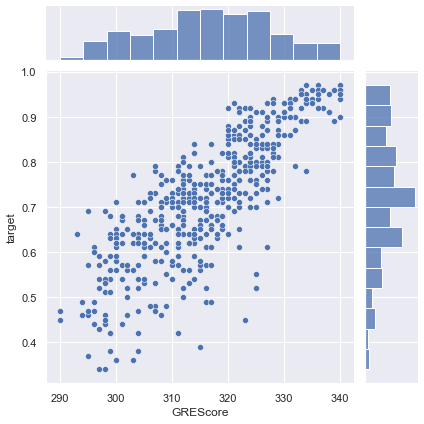

In [10]:
sns.jointplot('GREScore','target',data=data_std,kind='scatter')#توضيح العلاقة بين   

In [ ]:
sns.jointplot('TOEFLScore','target',data=data_std,kind='scatter')#توضيح العلاقة بين   

In [ ]:
sns.jointplot('UniversityRating','target',data=data_std,kind='scatter')#توضيح العلاقة بين  

In [ ]:
sns.jointplot('SOP','target',data=data_std,kind='scatter')#توضيح العلاقة بين  

In [ ]:
sns.jointplot('LOR','target',data=data_std,kind='scatter')#توضيح العلاقة بين  

In [ ]:
sns.jointplot('CGPA','target',data=data_std,kind='scatter')#توضيح العلاقة بين  

In [ ]:
#توضيح العلاقة بين التارجت  والفرضيات المتاحة
#sns.pairplot(data_std, hue="target", palette=["green","blue"])
sns.pairplot(data_std)  #pairplot
plt.show()

In [4]:
#X = data_std.iloc[:,0:8].values#الفرضيات المتاحة للتقيم
X=data_std[['GREScore','TOEFLScore','SOP','LOR','CGPA']]
y=data_std['target']

#y = data_std.iloc[:,8].values# التارجت

KeyError: "['GREScore', 'TOEFLScore', 'LOR'] not in index"

In [12]:
from sklearn.model_selection import train_test_split# import sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)#25% test - 75% training


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler #تحويل القيم الى قيم نورمال او ستاندر 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [16]:
#Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 0.003614938228922673
MAE: 0.045307933852963396
RMSE: 0.06012435637013234
r2_score: 0.7715079186838398


r2 score =0.77% LinearRegression()